In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('ESSdata_Thinkful .csv')

In [3]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [4]:
null = df.isnull().sum() / len(df)
null[null > 0]

tvtot      0.000931
ppltrst    0.001629
pplfair    0.004538
pplhlp     0.002909
happy      0.003607
sclmeet    0.001745
sclact     0.010938
gndr       0.001164
agea       0.027810
partner    0.001978
dtype: float64

In [5]:
df = df.dropna()

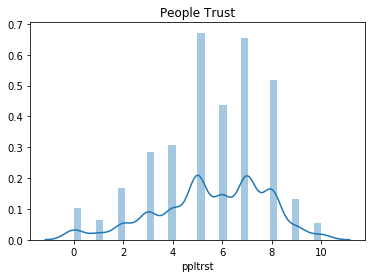

In [6]:
sns.distplot(df.ppltrst)
plt.title('People Trust')
plt.show()

__1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.__

In [7]:
year_seven = df.loc[df.year == 7]
year_six = df.loc[df.year == 6]

In [8]:
w_stat = stats.shapiro(df.ppltrst)[0]
print(w_stat)

0.9553747773170471


C:\Anaconda\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [9]:
print(year_seven.ppltrst.mean())
print(year_six.ppltrst.mean())

5.5713935230618254
5.578481945467944


In [10]:
print(year_seven.ppltrst.std())
print(year_six.ppltrst.std())

2.219723327964319
2.212021822918343


In [11]:
stats.ttest_ind(year_seven.ppltrst, year_six.ppltrst)

Ttest_indResult(statistic=-0.1443685081969842, pvalue=0.8852130548889106)

This is not too surprising as the means are not very different.

__2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.__

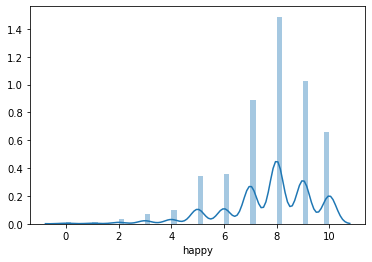

In [12]:
sns.distplot(df.happy)
plt.show()

In [13]:
w_stat = stats.shapiro(df.happy)[0]
print(w_stat)

0.9003236889839172


In [14]:
print('The mean for year six is {}'.format(year_six.happy.mean()))
print('The mean for year seven is {}'.format(year_seven.happy.mean()))

The mean for year six is 7.731515598133137
The mean for year seven is 7.6854759568204125


In [15]:
stats.ttest_ind(year_seven.happy, year_six.happy)

Ttest_indResult(statistic=-1.2074597686358974, pvalue=0.2272901912283969)

In [16]:
df.columns

Index(['cntry', 'idno', 'year', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp',
       'happy', 'sclmeet', 'sclact', 'gndr', 'agea', 'partner'],
      dtype='object')

__3. Who reported watching more TV in 2012, men or women?__


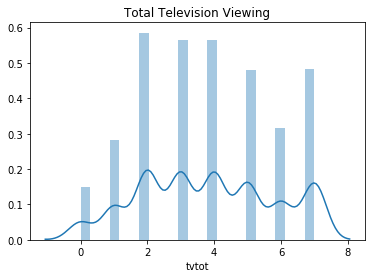

In [17]:
sns.distplot(df.tvtot)
plt.title('Total Television Viewing')
plt.show()

In [18]:
gender_one = df.loc[df.gndr == 1.0]
gender_two = df.loc[df.gndr == 2.0]

In [19]:
w_stat = stats.shapiro(df.tvtot)[0]
print(w_stat)

0.943733274936676


In [20]:
print('The mean for gender one is {}'.format(gender_one.tvtot.mean()))
print('The mean for gender one is {}'.format(gender_two.tvtot.mean()))

The mean for gender one is 3.7828418230563003
The mean for gender one is 3.8548466864490605


In [21]:
stats.ttest_ind(year_seven.happy, year_six.happy)

Ttest_indResult(statistic=-1.2074597686358974, pvalue=0.2272901912283969)

__4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?__


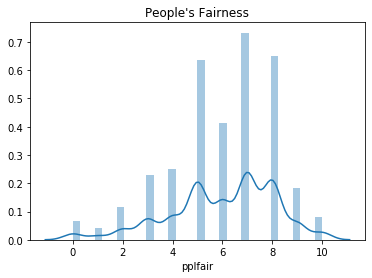

In [23]:
sns.distplot(df.pplfair)
plt.title("People's Fairness")
plt.show()

In [27]:
w_stat = stats.shapiro(df.pplfair)[0]
print(w_stat)

0.9477115273475647


In [26]:
partner_one = df.loc[df.partner == 1.0]
partner_two = df.loc[df.partner == 2.0]

In [29]:
print('The Partner One feeling of people fairness is {}'.format(partner_one.pplfair.mean()))
print('The Partner Two feeling of people fairness is {}'.format(partner_two.pplfair.mean()))

The Partner One feeling of people fairness is 6.062238180730102
The Partner Two feeling of people fairness is 5.913848117421825


In [30]:
stats.ttest_ind(partner_one.pplfair, partner_two.pplfair)

Ttest_indResult(statistic=3.0751595802436618, pvalue=0.002110868444877708)

This is the only one that meets our p_value threshold!

__5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?__

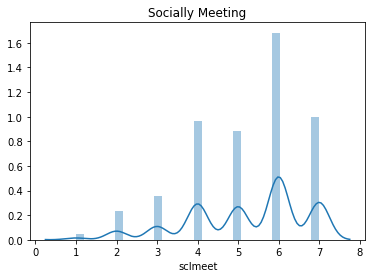

In [33]:
sns.distplot(df.sclmeet)
plt.title('Socially Meeting')
plt.show()

In [35]:
w_stat = stats.shapiro(df.sclmeet)[0]
print(w_stat)

0.8999220132827759


In [36]:
es = df.loc[df.cntry == 'ES']
se = df.loc[df.cntry == 'SE']
ch = df.loc[df.cntry == 'CH']

In [37]:
print('ES country mean social meet is {}'.format(es.sclmeet.mean()))
print('SE country mean social meet is {}'.format(se.sclmeet.mean()))
print('CH country mean social meet is {}'.format(ch.sclmeet.mean()))

ES country mean social meet is 5.2425828970331585
SE country mean social meet is 5.485515643105446
CH country mean social meet is 5.149830508474576


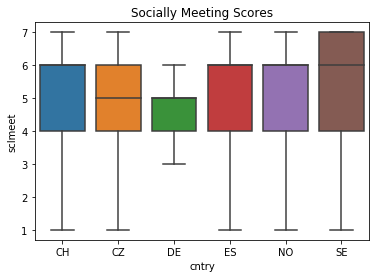

In [40]:
sns.boxplot(x='cntry', y='sclmeet', data=df)
plt.title('Socially Meeting Scores')
plt.show()

In [41]:
F, p = stats.f_oneway(es.sclmeet, se.sclmeet, ch.sclmeet)

# The F statistic.
print(F)


print(p)

25.34255537348552
1.1075497192695671e-11


Looks like the means from these are overall different than the population. Let's look at each pairing individually

In [44]:
print(stats.ttest_ind(es.sclmeet, se.sclmeet))
print(stats.ttest_ind(es.sclmeet, ch.sclmeet))
print(stats.ttest_ind(se.sclmeet, ch.sclmeet))

Ttest_indResult(statistic=-5.3035225944285, pvalue=1.1970737838115654e-07)
Ttest_indResult(statistic=1.96465567838015, pvalue=0.04952753938685751)
Ttest_indResult(statistic=7.0059696698977705, pvalue=2.9777097827191135e-12)
